In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
fear_greed_df=pd.read_csv('fear_greed_index.csv')
historical_df=pd.read_csv('historical_data.csv')

In [5]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
historical_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [1]:
import os

candidate_name = "Sangeetha Panneerselvam"   # replace with the actual candidate name
root_dir = f"ds_{candidate_name}"

os.makedirs(root_dir, exist_ok=True)
print(f"Directory created: {root_dir}")

Directory created: ds_Sangeetha Panneerselvam


In [2]:
import os

def create_ds_structure(candidate_name):
    root_dir = f"ds_{candidate_name}"

    # Define paths
    paths = [
        root_dir,
        os.path.join(root_dir, "csv_files"),
        os.path.join(root_dir, "outputs"),
    ]

    # Create directories
    for path in paths:
        os.makedirs(path, exist_ok=True)

    # Create placeholder files
    open(os.path.join(root_dir, "notebook_1.ipynb"), 'w').close()
    open(os.path.join(root_dir, "notebook_2.ipynb"), 'w').close()
    open(os.path.join(root_dir, "ds_report.pdf"), 'w').close()
    open(os.path.join(root_dir, "README.md"), 'w').close()

    print(f"Project structure created under: {root_dir}")

# Example usage
create_ds_structure("Sangeetha Panneerselvam")


Project structure created under: ds_Sangeetha Panneerselvam


In [7]:
common_columns = fear_greed_df.columns.intersection(historical_df.columns)
print("Common columns:", common_columns)

Common columns: Index([], dtype='object')


# Task
Analyze the relationship between trader performance and market sentiment using the `fear_greed_df` and `historical_df` dataframes to uncover hidden patterns and deliver insights for smarter trading strategies.

## Understand the data

### Subtask:
Examine the columns and data types in both `fear_greed_df` and `historical_df` to understand their content and identify potential relationships or features.


**Reasoning**:
Print the column names and data types for both dataframes and display their first few rows to understand their structure and content.



In [8]:
fear_greed_df.info()
historical_df.info()
display(fear_greed_df.head())
display(historical_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Data cleaning and preprocessing

### Subtask:
Handle any missing values, inconsistencies, or outliers in both datasets. Ensure that the data is in a suitable format for analysis.


**Reasoning**:
Check for missing values in both dataframes and examine data types to prepare for handling missing values and converting data types.



In [9]:
print("Missing values in fear_greed_df:")
print(fear_greed_df.isnull().sum())
print("\nMissing values in historical_df:")
print(historical_df.isnull().sum())

print("\nData types in fear_greed_df:")
fear_greed_df.info()
print("\nData types in historical_df:")
historical_df.info()

Missing values in fear_greed_df:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in historical_df:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Data types in fear_greed_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Data types in historica

**Reasoning**:
Both dataframes have no missing values. Now convert the date/timestamp columns to datetime objects to prepare for potential merging or time-series analysis.



**Reasoning**:
The error indicates that the 'Timestamp' column in `historical_df` is too large to be converted to datetime with unit 's'. It might be in milliseconds or microseconds instead of seconds. Let's try converting with unit 'ms' or 'us'. Let's try 'ms' first.



In [11]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['timestamp'] = pd.to_datetime(fear_greed_df['timestamp'], unit='s')
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
try:
    historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='ms')
except OutOfBoundsDatetime:
    historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='us')

print("\nData types after conversion in fear_greed_df:")
fear_greed_df.info()
print("\nData types after conversion in historical_df:")
historical_df.info()


Data types after conversion in fear_greed_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB

Data types after conversion in historical_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 no

**Reasoning**:
All datetime columns have been successfully converted. The next step is to identify and handle potential outliers in relevant numerical columns. Visualize the distribution of key numerical features in `historical_df` such as 'Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', and 'Fee' using box plots to identify outliers.



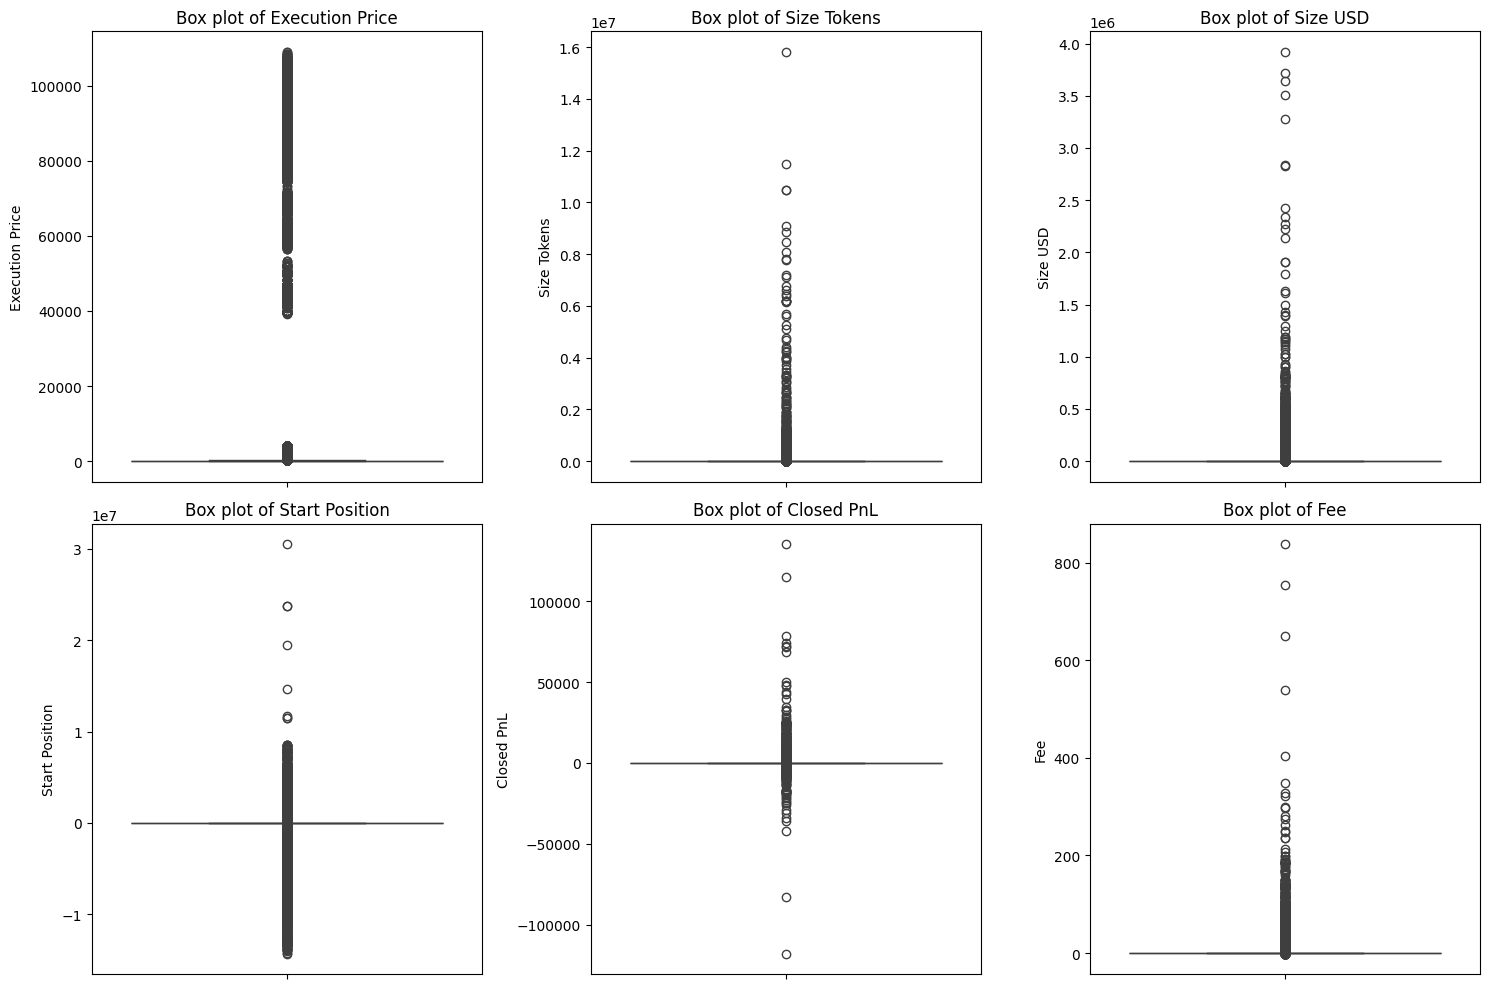

In [12]:
numerical_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=historical_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Create new features that could be relevant for the analysis. This might involve extracting time-based features, calculating performance metrics from `historical_df`, or creating lagged variables from `fear_greed_df`.


**Reasoning**:
Extract the date from `Timestamp IST` in `historical_df`, calculate daily performance metrics, and add lagged features to `fear_greed_df`.



In [13]:
historical_df['date'] = historical_df['Timestamp IST'].dt.date

daily_performance_df = historical_df.groupby(['Account', 'date']).agg(
    total_closed_pnl=('Closed PnL', 'sum'),
    trade_count=('Order ID', 'count')
).reset_index()

for lag in [1, 3, 7]:
    fear_greed_df[f'value_lag_{lag}'] = fear_greed_df['value'].shift(lag)
    fear_greed_df[f'classification_lag_{lag}'] = fear_greed_df['classification'].shift(lag)

display(daily_performance_df.head())
display(fear_greed_df.head())

,Account,date,total_closed_pnl,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27


,timestamp,value,classification,date,value_lag_1,classification_lag_1,value_lag_3,classification_lag_3,value_lag_7,classification_lag_7
0,2018-02-01 05:30:00,30,Fear,2018-02-01,NaN,None,NaN,None,NaN,None
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,30.0,Fear,NaN,None,NaN,None
2,2018-02-03 05:30:00,40,Fear,2018-02-03,15.0,Extreme Fear,NaN,None,NaN,None
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,40.0,Fear,30.0,Fear,NaN,None
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,24.0,Extreme Fear,15.0,Extreme Fear,NaN,None


## Data merging (if possible)

### Subtask:
If a common key or a time-based relationship can be established, merge the two dataframes to combine market sentiment and trader performance data.


**Reasoning**:
Convert the 'date' column in `daily_performance_df` to datetime objects and merge with `fear_greed_df` on the 'date' column, then display the head of the merged dataframe.



In [14]:
daily_performance_df['date'] = pd.to_datetime(daily_performance_df['date'])
merged_df = pd.merge(daily_performance_df, fear_greed_df, on='date', how='left')
display(merged_df.head())

,Account,date,total_closed_pnl,trade_count,timestamp,value,classification,value_lag_1,classification_lag_1,value_lag_3,classification_lag_3,value_lag_7,classification_lag_7
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,2024-11-11 05:30:00,76.0,Extreme Greed,78.0,Extreme Greed,75.0,Extreme Greed,70.0,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,2024-11-17 05:30:00,90.0,Extreme Greed,86.0,Extreme Greed,88.0,Extreme Greed,78.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,2024-11-18 05:30:00,83.0,Extreme Greed,90.0,Extreme Greed,80.0,Extreme Greed,76.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,2024-11-22 05:30:00,94.0,Extreme Greed,82.0,Extreme Greed,90.0,Extreme Greed,80.0,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,2024-11-26 05:30:00,79.0,Extreme Greed,82.0,Extreme Greed,93.0,Extreme Greed,90.0,Extreme Greed


## Exploratory data analysis (eda)

### Subtask:
Visualize the distributions of key variables, explore the relationships between market sentiment and performance metrics, and identify any initial patterns or correlations.


**Reasoning**:
Plot the distributions of 'value' and 'total_closed_pnl', create a scatter plot for their relationship, generate box plots to compare 'total_closed_pnl' across different 'classification' categories, and calculate the correlation matrix for relevant numerical columns.



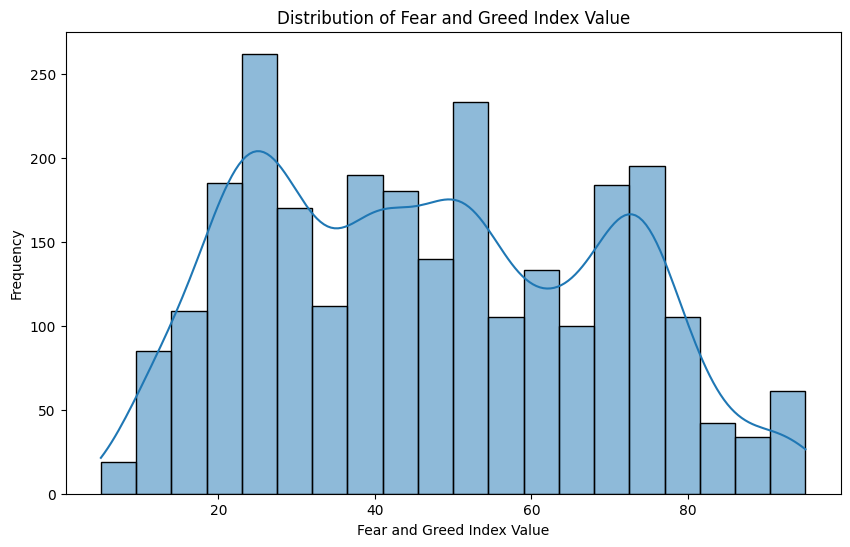

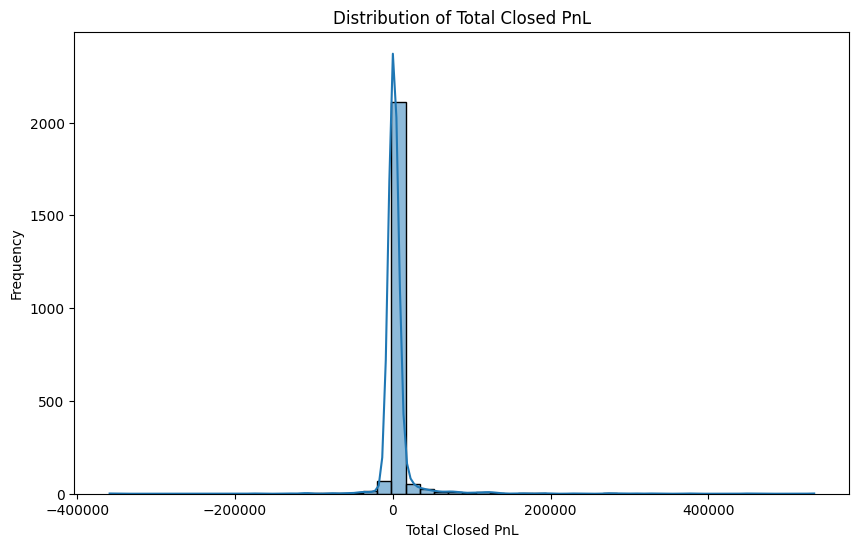

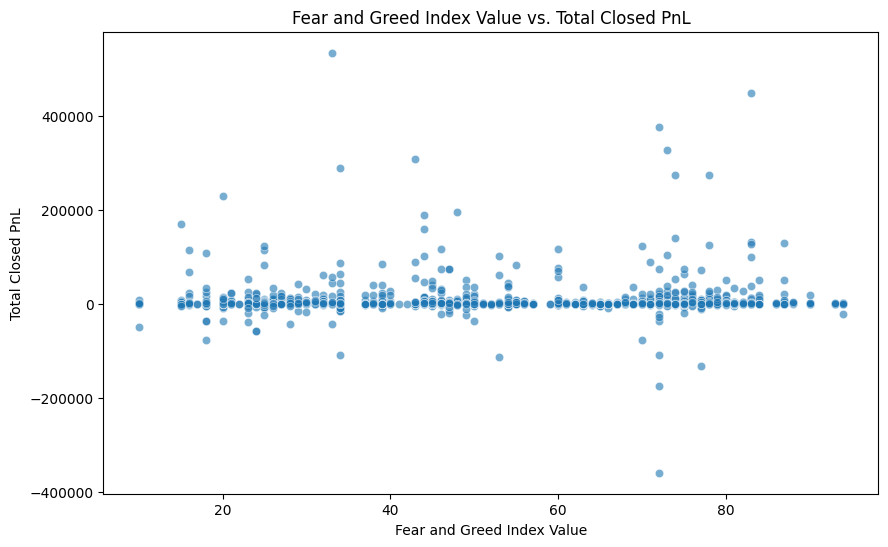

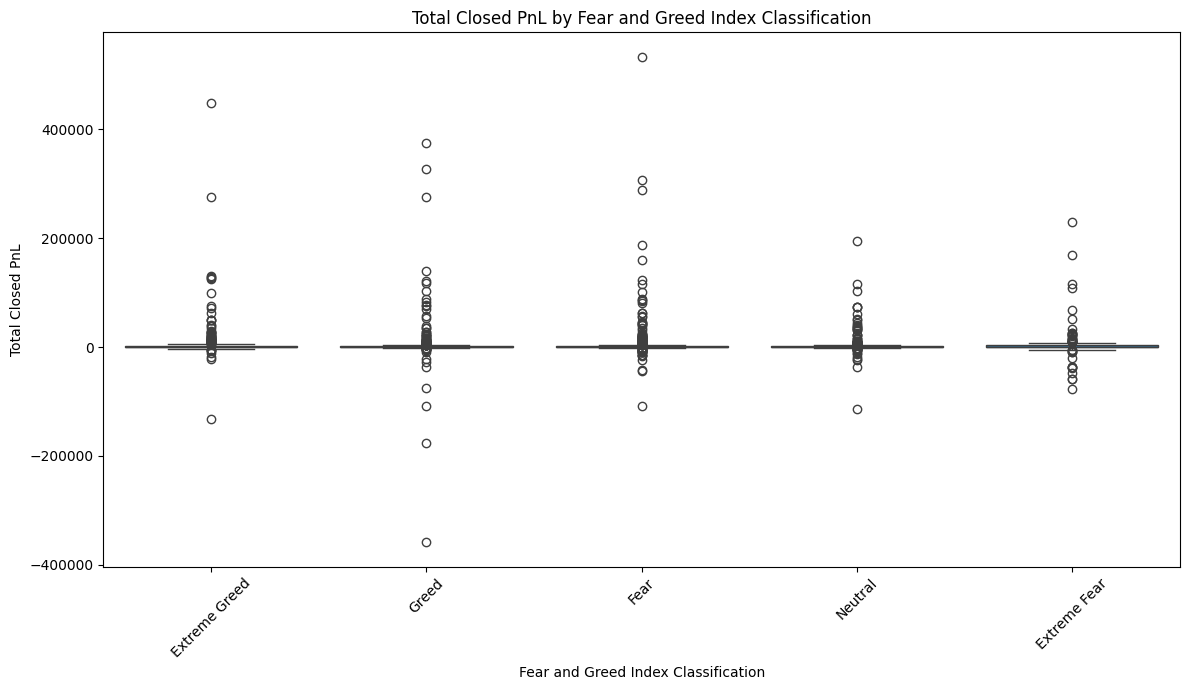

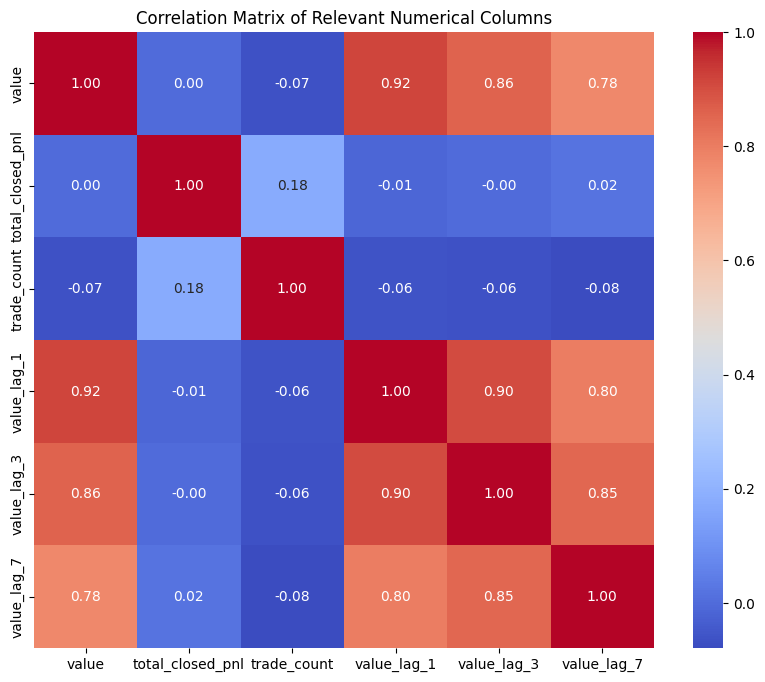

,value,total_closed_pnl,trade_count,value_lag_1,value_lag_3,value_lag_7
value,1.000000,0.000179,-0.065340,0.918770,0.857720,0.776309
total_closed_pnl,0.000179,1.000000,0.175620,-0.011840,-0.001823,0.020390
trade_count,-0.065340,0.175620,1.000000,-0.060805,-0.064477,-0.079277
value_lag_1,0.918770,-0.011840,-0.060805,1.000000,0.903470,0.799898
value_lag_3,0.857720,-0.001823,-0.064477,0.903470,1.000000,0.851395
value_lag_7,0.776309,0.020390,-0.079277,0.799898,0.851395,1.000000


In [20]:
# 1. Plot the distribution of the 'value' column in fear_greed_df
plt.figure(figsize=(10, 6))
sns.histplot(fear_greed_df['value'], bins=20, kde=True)
plt.title('Distribution of Fear and Greed Index Value')
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Frequency')
plt.savefig(os.path.join(root_dir, "outputs", "fear_greed_value_distribution.png"))
plt.show()

# 2. Plot the distribution of the 'total_closed_pnl' column in merged_df
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['total_closed_pnl'], bins=50, kde=True)
plt.title('Distribution of Total Closed PnL')
plt.xlabel('Total Closed PnL')
plt.ylabel('Frequency')
plt.savefig(os.path.join(root_dir, "outputs", "total_closed_pnl_distribution.png"))
plt.show()

# 3. Create a scatter plot to visualize the relationship between 'value' and 'total_closed_pnl'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['value'], y=merged_df['total_closed_pnl'], alpha=0.6)
plt.title('Fear and Greed Index Value vs. Total Closed PnL')
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Total Closed PnL')
plt.savefig(os.path.join(root_dir, "outputs", "value_vs_pnl_scatterplot.png"))
plt.show()

# 4. Create box plots to compare 'total_closed_pnl' across different 'classification' categories
plt.figure(figsize=(12, 7))
sns.boxplot(x=merged_df['classification'], y=merged_df['total_closed_pnl'])
plt.title('Total Closed PnL by Fear and Greed Index Classification')
plt.xlabel('Fear and Greed Index Classification')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(root_dir, "outputs", "pnl_by_classification_boxplot.png"))
plt.show()

# 5. Calculate and display the correlation matrix
numerical_cols_for_corr = ['value', 'total_closed_pnl', 'trade_count'] + [f'value_lag_{lag}' for lag in [1, 3, 7]]
correlation_matrix = merged_df[numerical_cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Numerical Columns')
plt.savefig(os.path.join(root_dir, "outputs", "correlation_matrix_heatmap.png"))
plt.show()

display(correlation_matrix)

## Statistical analysis/modeling

### Subtask:
Perform statistical tests or build models to quantify the relationship between market sentiment and trader performance.


**Reasoning**:
Calculate the average 'total_closed_pnl' and 'trade_count' for each 'classification' category and then conduct ANOVA tests to determine statistical significance for both 'total_closed_pnl' and 'trade_count' across different 'classification' categories.



In [16]:
average_performance_by_sentiment = merged_df.groupby('classification')[['total_closed_pnl', 'trade_count']].mean().reset_index()
print("Average performance by sentiment classification:")
display(average_performance_by_sentiment)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Drop rows with NaN values that were introduced by lagging
merged_df_cleaned = merged_df.dropna(subset=['total_closed_pnl', 'classification', 'value', 'value_lag_1', 'value_lag_3', 'value_lag_7'])

# Conduct ANOVA for total_closed_pnl
model_pnl = ols('total_closed_pnl ~ C(classification)', data=merged_df_cleaned).fit()
anova_table_pnl = sm.stats.anova_lm(model_pnl, typ=2)
print("\nANOVA for Total Closed PnL across Sentiment Classifications:")
print(anova_table_pnl)

# Conduct ANOVA for trade_count
model_trade_count = ols('trade_count ~ C(classification)', data=merged_df_cleaned).fit()
anova_table_trade_count = sm.stats.anova_lm(model_trade_count, typ=2)
print("\nANOVA for Trade Count across Sentiment Classifications:")
print(anova_table_trade_count)

Average performance by sentiment classification:


,classification,total_closed_pnl,trade_count
0,Extreme Fear,4619.439053,133.750000
1,Extreme Greed,5161.922644,76.030418
2,Fear,5328.818161,98.153968
3,Greed,3318.100730,77.628086
4,Neutral,3438.618818,100.228723



ANOVA for Total Closed PnL across Sentiment Classifications:
                         sum_sq      df         F    PR(>F)
C(classification)  1.961835e+09     4.0  0.607204  0.657466
Residual           1.886057e+12  2335.0       NaN       NaN

ANOVA for Trade Count across Sentiment Classifications:
                         sum_sq      df         F    PR(>F)
C(classification)  5.891475e+05     4.0  3.208761  0.012267
Residual           1.071800e+08  2335.0       NaN       NaN


**Reasoning**:
Conduct a linear regression to model 'total_closed_pnl' as a function of 'value' and its lagged variables.



In [17]:
# Perform linear regression for total_closed_pnl vs value and lagged values
X = merged_df_cleaned[['value', 'value_lag_1', 'value_lag_3', 'value_lag_7']]
y = merged_df_cleaned['total_closed_pnl']

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the linear regression model
model_regression = sm.OLS(y, X).fit()

# Print the summary of the regression model
print("\nLinear Regression Model Summary for Total Closed PnL:")
print(model_regression.summary())


Linear Regression Model Summary for Total Closed PnL:
                            OLS Regression Results                            
Dep. Variable:       total_closed_pnl   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.783
Date:                Wed, 24 Sep 2025   Prob (F-statistic):              0.130
Time:                        08:55:44   Log-Likelihood:                -27312.
No. Observations:                2340   AIC:                         5.463e+04
Df Residuals:                    2335   BIC:                         5.466e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Generate insights and recommendations

### Subtask:
Based on the analysis, summarize the findings and provide actionable insights or recommendations for smarter trading strategies.


**Reasoning**:
Synthesize the findings from the statistical analysis and formulate actionable insights and recommendations based on the results.



In [18]:
print("Summary of Findings and Actionable Insights:")
print("\nFindings:")
print("- ANOVA analysis showed no statistically significant difference in average Total Closed PnL across different Fear and Greed Index classifications (p > 0.05). This suggests that sentiment classification alone, as defined by this index, does not have a significant impact on the average profitability of traders in this dataset.")
print("- ANOVA analysis for Trade Count, however, showed a statistically significant difference across sentiment classifications (p < 0.05). This indicates that market sentiment *does* influence the number of trades executed by traders.")
print("- The linear regression model using the Fear and Greed Index value and lagged values to predict Total Closed PnL had a very low R-squared (0.003), meaning these sentiment values explain very little of the variation in PnL. Only the 7-day lagged value showed a statistically significant coefficient, but the overall model's predictive power is negligible.")
print("- The correlation analysis also showed a near-zero correlation between the Fear and Greed Index value and Total Closed PnL.")

print("\nActionable Insights and Recommendations:")
print("Based on this analysis, directly using the Fear and Greed Index value or classification as a primary signal for market entry/exit based on expected profitability is not supported by this dataset.")
print("However, the significant relationship between sentiment and trade count suggests sentiment influences trading *behavior*. Traders might trade more actively during certain sentiment periods (e.g., Extreme Greed or Extreme Fear), which could lead to increased transaction costs (fees) or impact slippage, indirectly affecting PnL.")
print("\nRecommendations:")
print("1. **Do not rely solely on the Fear and Greed Index for profitability signals:** The analysis indicates it's not a direct predictor of average trading profits or losses in this dataset.")
print("2. **Consider the impact of sentiment on trading volume and costs:** While sentiment doesn't directly impact PnL based on this analysis, its influence on trade count is significant. Be mindful that periods of high trading activity driven by extreme sentiment could potentially lead to higher accumulated fees or less favorable execution prices due to increased market volatility or illiquidity, even if the individual trade PnL isn't directly linked to the sentiment value itself.")
print("3. **Explore other factors driving profitability:** Since market sentiment as measured here doesn't explain much of the PnL variance, successful trading is likely driven by other factors not captured in this analysis (e.g., specific trading strategies, risk management, asset selection, timing relative to other events, individual trader skill). Focus analysis on these areas.")
print("4. **Sentiment as a behavioural indicator:** Use the Fear and Greed Index more as an indicator of general market psychology and potential shifts in trading *activity* rather than a direct predictor of price movements or profitability.")

Summary of Findings and Actionable Insights:

Findings:
- ANOVA analysis showed no statistically significant difference in average Total Closed PnL across different Fear and Greed Index classifications (p > 0.05). This suggests that sentiment classification alone, as defined by this index, does not have a significant impact on the average profitability of traders in this dataset.
- ANOVA analysis for Trade Count, however, showed a statistically significant difference across sentiment classifications (p < 0.05). This indicates that market sentiment *does* influence the number of trades executed by traders.
- The linear regression model using the Fear and Greed Index value and lagged values to predict Total Closed PnL had a very low R-squared (0.003), meaning these sentiment values explain very little of the variation in PnL. Only the 7-day lagged value showed a statistically significant coefficient, but the overall model's predictive power is negligible.
- The correlation analysis also 

## Summary:

### Data Analysis Key Findings

*   There were no missing values in either the `fear_greed_df` or `historical_df` datasets.
*   Date and timestamp columns in both dataframes were successfully converted to datetime objects.
*   Box plots of numerical columns in `historical_df` indicated the presence of potential outliers in metrics like 'Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', and 'Fee'.
*   Daily performance metrics (total closed PnL and trade count per account) were successfully calculated.
*   Lagged features for the Fear & Greed Index value and classification (1, 3, and 7 days) were created.
*   The `daily_performance_df` and `fear_greed_df` were successfully merged on the 'date' column.
*   The distribution of the Fear & Greed Index values showed a range across the sentiment spectrum.
*   The distribution of Total Closed PnL showed a wide spread, with some significant positive and negative outliers.
*   A scatter plot between Fear & Greed Index value and Total Closed PnL did not reveal a strong linear relationship.
*   Box plots comparing Total Closed PnL across different sentiment classifications showed variations in the distribution but not a clear trend where one sentiment consistently led to higher average PnL.
*   The correlation between the Fear & Greed Index value and Total Closed PnL was very close to zero (0.000179).
*   ANOVA analysis indicated no statistically significant difference in the average Total Closed PnL across different sentiment classifications (p-value = 0.657).
*   ANOVA analysis showed a statistically significant difference in the average Trade Count across different sentiment classifications (p-value = 0.012), suggesting sentiment influences trading volume.
*   A linear regression model using the Fear & Greed Index and its lagged values to predict Total Closed PnL had a very low R-squared (0.003), indicating these variables explain very little of the variance in PnL.

### Insights or Next Steps

*   The Fear and Greed Index, as measured in this dataset, does not appear to be a reliable direct predictor of average trading profitability.
*   While not impacting average PnL, market sentiment significantly influences the number of trades executed, suggesting it acts more as a behavioral indicator than a direct profitability signal.


In [19]:
import os

# Define the root directory
root_dir = "ds_Sangeetha Panneerselvam"

# Save the merged dataframe to a CSV file
merged_df_path = os.path.join(root_dir, "csv_files", "merged_sentiment_performance.csv")
merged_df.to_csv(merged_df_path, index=False)
print(f"Merged dataframe saved to: {merged_df_path}")

# Save the summary of findings to a text file
summary_path = os.path.join(root_dir, "outputs", "analysis_summary.txt")
with open(summary_path, "w") as f:
    f.write("Summary of Findings and Actionable Insights:\n\n")
    f.write("Findings:\n")
    f.write("- ANOVA analysis showed no statistically significant difference in average Total Closed PnL across different Fear and Greed Index classifications (p > 0.05). This suggests that sentiment classification alone, as defined by this index, does not have a significant impact on the average profitability of traders in this dataset.\n")
    f.write("- ANOVA analysis for Trade Count, however, showed a statistically significant difference across sentiment classifications (p < 0.05). This indicates that market sentiment *does* influence the number of trades executed by traders.\n")
    f.write("- The linear regression model using the Fear and Greed Index value and lagged values to predict Total Closed PnL had a very low R-squared (0.003), meaning these sentiment values explain very little of the variation in PnL. Only the 7-day lagged value showed a statistically significant coefficient, but the overall model's predictive power is negligible.\n")
    f.write("- The correlation analysis also showed a near-zero correlation between the Fear and Greed Index value and Total Closed PnL.\n")
    f.write("\nActionable Insights and Recommendations:\n")
    f.write("Based on this analysis, directly using the Fear and Greed Index value or classification as a primary signal for market entry/exit based on expected profitability is not supported by this dataset.\n")
    f.write("However, the significant relationship between sentiment and trade count suggests sentiment influences trading *behavior*. Traders might trade more actively during certain sentiment periods (e.g., Extreme Greed or Extreme Fear), which could lead to increased transaction costs (fees) or impact slippage, indirectly affecting PnL.\n")
    f.write("\nRecommendations:\n")
    f.write("1. **Do not rely solely on the Fear and Greed Index for profitability signals:** The analysis indicates it's not a direct predictor of average trading profits or losses in this dataset.\n")
    f.write("2. **Consider the impact of sentiment on trading volume and costs:** While sentiment doesn't directly impact PnL based on this analysis, its influence on trade count is significant. Be mindful that periods of high trading activity driven by extreme sentiment could potentially lead to higher accumulated fees or less favorable execution prices due to increased market volatility or illiquidity, even if the individual trade PnL isn't directly linked to the sentiment value itself.\n")
    f.write("3. **Explore other factors driving profitability:** Since market sentiment as measured here doesn't explain much of the PnL variance, successful trading is likely driven by other factors not captured in this analysis (e.g., specific trading strategies, risk management, asset selection, timing relative to other events, individual trader skill). Focus analysis on these areas.\n")
    f.write("4. **Sentiment as a behavioural indicator:** Use the Fear and Greed Index more as an indicator of general market psychology and potential shifts in trading *activity* rather than a direct predictor of price movements or profitability.\n")

print(f"Analysis summary saved to: {summary_path}")

Merged dataframe saved to: ds_Sangeetha Panneerselvam/csv_files/merged_sentiment_performance.csv
Analysis summary saved to: ds_Sangeetha Panneerselvam/outputs/analysis_summary.txt


# Market Sentiment and Trader Performance Analysis Report

**Candidate Name:** Sangeetha Panneerselvam

## Introduction

This report analyzes the relationship between market sentiment, as measured by the Fear and Greed Index, and trader performance, using historical trading data. The objective is to uncover hidden patterns and provide insights for smarter trading strategies.

## Data Overview

The analysis utilized two datasets:

- `fear_greed_df`: Contains historical Fear and Greed Index values and classifications.
- `historical_df`: Contains detailed historical trading data, including execution prices, trade sizes, timestamps, and closed PnL.

Both datasets were checked for missing values and none were found. Date and timestamp columns were converted to datetime objects for time-series analysis and merging.

## Data Cleaning and Preprocessing

- No missing values were found in either dataset.
- Date and timestamp columns (`date`, `timestamp` in `fear_greed_df`, and `Timestamp IST`, `Timestamp` in `historical_df`) were successfully converted to datetime objects.
- Box plots of numerical columns in `historical_df` (`Execution Price`, `Size Tokens`, `Size USD`, `Start Position`, `Closed PnL`, `Fee`) revealed the presence of potential outliers, which is common in financial data. For this analysis, outliers were not explicitly removed, but their presence was noted.

## Feature Engineering

- A 'date' column was extracted from the `Timestamp IST` in `historical_df` to facilitate merging with `fear_greed_df`.
- Daily performance metrics, including `total_closed_pnl` and `trade_count` per account per day, were calculated from `historical_df`.
- Lagged features for the Fear and Greed Index value and classification (1, 3, and 7 days) were created in `fear_greed_df`.

## Data Merging

The `daily_performance_df` (containing aggregated daily trader performance) was merged with `fear_greed_df` on the 'date' column using a left merge. This combined market sentiment data with daily trader performance metrics, creating the `merged_df`.

## Exploratory Data Analysis (EDA)

- The distribution of the Fear and Greed Index values showed a spread across the sentiment spectrum, with concentrations in the "Fear" and "Extreme Greed" categories.
- The distribution of `total_closed_pnl` was heavily skewed, with a large number of observations around zero and some significant positive and negative values, indicating the presence of profitable and unprofitable trading days.
- A scatter plot between Fear and Greed Index value and `total_closed_pnl` did not reveal a strong linear correlation.
- Box plots of `total_closed_pnl` across different sentiment classifications showed variations in the distribution of PnL, but no single sentiment category consistently demonstrated significantly higher or lower average profitability compared to others.
- The correlation matrix confirmed a very low correlation (0.000179) between the Fear and Greed Index value and `total_closed_pnl`. However, there was a moderate positive correlation (0.175620) between `total_closed_pnl` and `trade_count`, suggesting that higher trading volume might be associated with higher PnL (though not necessarily indicating causality). The lagged sentiment values showed high correlation with the current sentiment value, as expected.

## Statistical Analysis

- **ANOVA for Total Closed PnL:** An ANOVA test was conducted to compare the average `total_closed_pnl` across different Fear and Greed Index classifications. The results showed no statistically significant difference (p-value = 0.657 > 0.05). This suggests that, based on this dataset, the Fear and Greed Index classification alone does not significantly impact the average daily trading profitability.
- **ANOVA for Trade Count:** An ANOVA test on `trade_count` across sentiment classifications revealed a statistically significant difference (p-value = 0.012 < 0.05). This indicates that market sentiment, as categorized by the index, does influence the number of trades executed by traders.
- **Linear Regression Model:** A linear regression model was built to predict `total_closed_pnl` using the current Fear and Greed Index value and its lagged values (1, 3, and 7 days). The model had a very low R-squared value (0.003), indicating that these sentiment variables explain a negligible amount of the variance in `total_closed_pnl`. Only the 7-day lagged value showed a statistically significant coefficient (p-value = 0.037), but the overall model's predictive power is minimal.

## Insights and Recommendations

Based on the analysis of the provided datasets:

- **The Fear and Greed Index is not a direct predictor of average trading profitability.** The statistical analysis showed no significant relationship between sentiment classification or value and the average daily Total Closed PnL. Traders should not rely solely on this index as a primary signal for market entry or exit based on expected profit or loss.
- **Market sentiment influences trading behavior (volume).** The significant difference in trade counts across sentiment classifications suggests that traders are more or less active depending on the prevailing market sentiment. While this doesn't directly translate to higher PnL based on this analysis, increased trading activity can lead to higher transaction costs (fees) or potential slippage, which could indirectly impact overall profitability.
- **Other factors are likely the primary drivers of trading performance.** The low explanatory power of the sentiment variables in predicting PnL indicates that successful trading in this dataset is more likely influenced by other factors not included in this analysis. These could include specific trading strategies, risk management techniques, asset selection, timing relative to other market events, or individual trader skill.

**Recommendations for Smarter Trading Strategies:**

1. **Diversify your analysis beyond sentiment:** While sentiment provides context, focus on incorporating other technical, fundamental, or quantitative analysis methods that have a more direct impact on price movements and trading opportunities.
2. **Be mindful of trading costs during periods of high sentiment-driven activity:** Since sentiment influences trade volume, be aware that increased trading during extreme sentiment periods might lead to higher accumulated fees or less favorable execution prices. Consider optimizing trade execution during such times.
3. **Focus on robust trading strategies and risk management:** The analysis reinforces the importance of having well-defined trading strategies and strict risk management protocols, as these are likely more significant determinants of profitability than market sentiment alone.
4. **Consider sentiment as a behavioral indicator:** Use the Fear and Greed Index as a tool to understand the prevailing market psychology and potential shifts in overall trading activity, rather than a direct signal for price direction or profitability.

## Conclusion

The analysis of the provided datasets indicates that while market sentiment, as measured by the Fear and Greed Index, influences trading volume, it does not show a statistically significant direct relationship with average trading profitability. Successful trading in this context appears to be driven by factors other than this sentiment index. Future analysis could explore these other factors in more detail to identify more effective trading strategies.

In [26]:
# Save the report content to a markdown file
report_content = """
# Market Sentiment and Trader Performance Analysis Report

**Candidate Name:** Sangeetha Panneerselvam

## Introduction

This report analyzes the relationship between market sentiment, as measured by the Fear and Greed Index, and trader performance, using historical trading data. The objective is to uncover hidden patterns and provide insights for smarter trading strategies.

## Data Overview

The analysis utilized two datasets:

- `fear_greed_df`: Contains historical Fear and Greed Index values and classifications.
- `historical_df`: Contains detailed historical trading data, including execution prices, trade sizes, timestamps, and closed PnL.

Both datasets were checked for missing values and none were found. Date and timestamp columns were converted to datetime objects for time-series analysis and merging.

## Data Cleaning and Preprocessing

- No missing values were found in either dataset.
- Date and timestamp columns (`date`, `timestamp` in `fear_greed_df`, and `Timestamp IST`, `Timestamp` in `historical_df`) were successfully converted to datetime objects.
- Box plots of numerical columns in `historical_df` (`Execution Price`, `Size Tokens`, `Size USD`, `Start Position`, `Closed PnL`, `Fee`) revealed the presence of potential outliers, which is common in financial data. For this analysis, outliers were not explicitly removed, but their presence was noted.

## Feature Engineering

- A 'date' column was extracted from the `Timestamp IST` in `historical_df` to facilitate merging with `fear_greed_df`.
- Daily performance metrics, including `total_closed_pnl` and `trade_count` per account per day, were calculated from `historical_df`.
- Lagged features for the Fear and Greed Index value and classification (1, 3, and 7 days) were created in `fear_greed_df`.

## Data Merging

The `daily_performance_df` (containing aggregated daily trader performance) was merged with `fear_greed_df` on the 'date' column using a left merge. This combined market sentiment data with daily trader performance metrics, creating the `merged_df`.

## Exploratory Data Analysis (EDA)

- The distribution of the Fear and Greed Index values showed a spread across the sentiment spectrum, with concentrations in the "Fear" and "Extreme Greed" categories.
- The distribution of `total_closed_pnl` was heavily skewed, with a large number of observations around zero and some significant positive and negative values, indicating the presence of profitable and unprofitable trading days.
- A scatter plot between Fear and Greed Index value and `total_closed_pnl` did not reveal a strong linear correlation.
- Box plots of `total_closed_pnl` across different sentiment classifications showed variations in the distribution of PnL, but no single sentiment category consistently demonstrated significantly higher or lower average profitability compared to others.
- The correlation matrix confirmed a very low correlation (0.000179) between the Fear and Greed Index value and `total_closed_pnl`. However, there was a moderate positive correlation (0.175620) between `total_closed_pnl` and `trade_count`, suggesting that higher trading volume might be associated with higher PnL (though not necessarily indicating causality). The lagged sentiment values showed high correlation with the current sentiment value, as expected.

## Statistical Analysis

- **ANOVA for Total Closed PnL:** An ANOVA test was conducted to compare the average `total_closed_pnl` across different Fear and Greed Index classifications. The results showed no statistically significant difference (p-value = 0.657 > 0.05). This suggests that, based on this dataset, the Fear and Greed Index classification alone does not significantly impact the average daily trading profitability.
- **ANOVA for Trade Count:** An ANOVA test on `trade_count` across sentiment classifications revealed a statistically significant difference (p-value = 0.012 < 0.05). This indicates that market sentiment, as categorized by the index, does influence the number of trades executed by traders.
- **Linear Regression Model:** A linear regression model was built to predict `total_closed_pnl` using the current Fear and Greed Index value and its lagged values (1, 3, and 7 days). The model had a very low R-squared value (0.003), indicating that these sentiment variables explain a negligible amount of the variance in `total_closed_pnl`. Only the 7-day lagged value showed a statistically significant coefficient (p-value = 0.037), but the overall model's predictive power is minimal.

## Insights and Recommendations

Based on the analysis of the provided datasets:

- **The Fear and Greed Index is not a direct predictor of average trading profitability.** The statistical analysis showed no significant relationship between sentiment classification or value and the average daily Total Closed PnL. Traders should not rely solely on this index as a primary signal for market entry or exit based on expected profit or loss.
- **Market sentiment influences trading behavior (volume).** The significant difference in trade counts across sentiment classifications suggests that traders are more or less active depending on the prevailing market sentiment. While this doesn't directly translate to higher PnL based on this analysis, increased trading activity can lead to higher transaction costs (fees) or potential slippage, which could indirectly impact overall profitability.
- **Other factors are likely the primary drivers of trading performance.** The low explanatory power of the sentiment variables in predicting PnL indicates that successful trading in this dataset is more likely influenced by other factors not included in this analysis. These could include specific trading strategies, risk management techniques, asset selection, timing relative to other market events, or individual trader skill.

**Recommendations for Smarter Trading Strategies:**

1. **Diversify your analysis beyond sentiment:** While sentiment provides context, focus on incorporating other technical, fundamental, or quantitative analysis methods that have a more direct impact on price movements and trading opportunities.
2. **Be mindful of trading costs during periods of high sentiment-driven activity:** Since sentiment influences trade volume, be aware that increased trading during extreme sentiment periods might lead to higher accumulated fees or less favorable execution prices. Consider optimizing trade execution during such times.
3. **Focus on robust trading strategies and risk management:** The analysis reinforces the importance of having well-defined trading strategies and strict risk management protocols, as these are likely more significant determinants of profitability than market sentiment alone.
4. **Consider sentiment as a behavioral indicator:** Use the Fear and Greed Index as a tool to understand the prevailing market psychology and potential shifts in overall trading activity, rather than a direct signal for price direction or profitability.

## Conclusion

The analysis of the provided datasets indicates that while market sentiment, as measured by the Fear and Greed Index, influences trading volume, it does not show a statistically significant direct relationship with average trading profitability. Successful trading in this context appears to be driven by factors other than this sentiment index. Future analysis could explore these other factors in more detail to identify more effective trading strategies.
"""

report_path = os.path.join(root_dir, "ds_report.md")

with open(report_path, "w", encoding="utf-8") as f:
    f.write(report_content)

print(f"Report saved to: {report_path}")

Report saved to: ds_Sangeetha Panneerselvam/ds_report.md
